In [354]:
import numpy as np
import matplotlib.pyplot as plt

# 고장밀도함수(f(t))의 종류
1. 지수분포(시스템의 고장)

2. 와이블분포(일반적인 수명분포)

### 1. 지수분포

여러개의 부품이 조합되어 만들어진 기기나 시스템의 고장밀도함수. 이때 고장률 $ \lambda(t) $는 시간에 관계없이 일정 (= CFR; Constatnt Failure Rate)

$ f(t;\theta) = 1/\theta * e^{-t/\theta} : 0 <= t   , \lambda = 1/\theta$


In [355]:
def exp_f(t,theta):
    return (1/theta)*e**(-t/theta)

##### 1.1 평균($\theta$)에 따른 분포 (  $\theta = 0.5, 1, 2$ )

$f(t;0.5) = 2 * e^{-2t}$

$f(t;1) = e^{-t}$

$f(t;2) = 0.5 * e^{-0.5t}$

In [356]:
e = np.exp(1);e

2.718281828459045

In [357]:
np.linspace(0,5,10)

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

In [358]:
t_list = list(np.linspace(0,5,100))

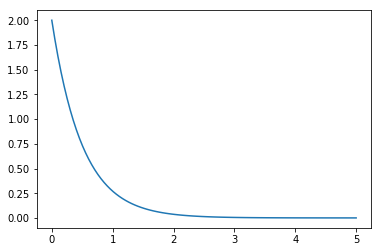

In [359]:
exp0_f_list = [exp_f(t,0.5) for t in t_list]
plt.plot(t_list, exp0_f_list)
plt.show()

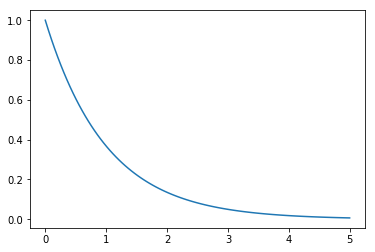

In [360]:
exp1_f_list = [exp_f(t,1) for t in t_list]
plt.plot(t_list, exp1_f_list)
plt.show()

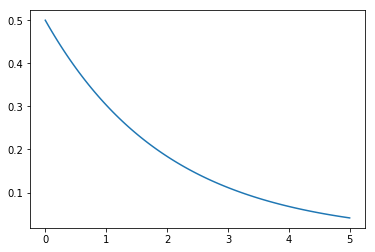

In [361]:
exp2_f_list = [exp_f(t,2) for t in t_list]
plt.plot(t_list, exp2_f_list)
plt.show()

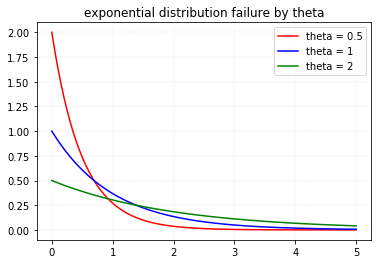

In [362]:
plt.plot(t_list,exp0_f_list,'r',label = 'theta = 0.5')
plt.plot(t_list,exp1_f_list,'b',label = 'theta = 1')
plt.plot(t_list,exp2_f_list,'g',label = 'theta = 2')

plt.title('exponential distribution failure by theta')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend()
plt.show()

##### 1.2 평균($\theta$)에 따른 누적 분포 (  $\theta = 0.5, 1, 2$ )

In [363]:
def exp_F(t,theta):
    return 1-e**(-(t/theta))

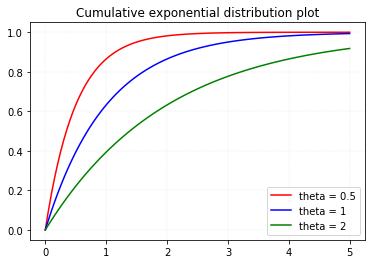

In [364]:
exp0_F_list = [exp_F(t,0.5) for t in t_list]
exp1_F_list = [exp_F(t,1) for t in t_list]
exp2_F_list = [exp_F(t,2) for t in t_list]

plt.plot(t_list,exp0_F_list,'r',label = 'theta = 0.5')
plt.plot(t_list,exp1_F_list,'b',label = 'theta = 1')
plt.plot(t_list,exp2_F_list,'g',label = 'theta = 2')

plt.title('Cumulative exponential distribution plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend()

plt.show()

##### 1.3 예제
1. 어떤 제품이 평균고장률 0.001/시간인 지수분포를 따를때 이 제품의 수명분포를 그리시오(0~2000시간)

2. 이 제품을 500시간 사용하였을때 신뢰도는?

In [365]:
h = 0.001
theta = 1/h

1

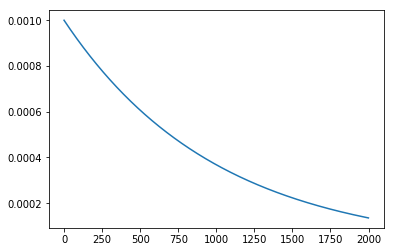

In [366]:
t_list = [t for t in range(2000)]
fail_list = [exp_f(t,theta) for t in t_list]

plt.plot(t_list, fail_list)
plt.show()

2

In [367]:
sol = 1-exp_F(500,theta);sol

0.6065306597126334

### 2. 와이블분포

신뢰성 분석에서 가장 널리 쓰이는 분포로 고장률이 어떻게 될지 모를때 사용

$f(t;\eta,\beta) = \beta/\eta * (t/\eta)^{\beta-1} * e^{-(t/\eta)^{\beta} }$

$\beta = 형상모수, \eta = 척도모수$

------


$\beta$ < 1 ; $\lambda (t)$는 DFR

$\beta$  = 1 ; $\lambda (t)$는 CFR이며, 지수분포에 대응

$\beta$  > 1 ; $\lambda (t)$는 IFR이며, 정규분포($\beta$=3.5 일때)에 대응


In [368]:
def weib_f(t,beta,eta):
    return (beta / eta) * (t / eta)**(beta - 1) * np.exp(-(t / eta)**beta)

##### 2.1 형상모수,위치모수($\beta,\eta$)에 따른 와이블 분포 

(  $\beta = 0.8, 1, 2$, $\eta = 1,2 $ )

In [369]:
t_list = list(np.linspace(0,5,100))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


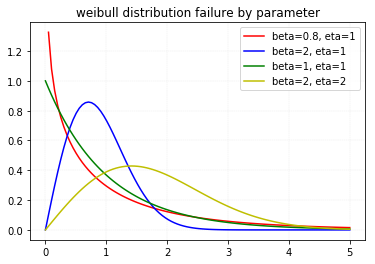

In [370]:
weib0_f_list = [weib_f(t,0.8,1) for t in t_list]
weib1_f_list = [weib_f(t,2,1) for t in t_list]
weib2_f_list = [weib_f(t,1,1) for t in t_list]
weib3_f_list = [weib_f(t,2,2) for t in t_list]


plt.plot(t_list,weib0_f_list,'r',label = 'beta=0.8, eta=1')
plt.plot(t_list,weib1_f_list,'b',label = 'beta=2, eta=1')
plt.plot(t_list,weib2_f_list,'g',label = 'beta=1, eta=1')
plt.plot(t_list,weib3_f_list,'y',label = 'beta=2, eta=2')


plt.title('weibull distribution failure by parameter')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend()

##### 2.2 형상모수,위치모수($\beta,\eta$)에 따른 와이블 누적 분포 

(  $\beta = 0.8, 1, 2$, $\eta = 1,2 $ )


In [371]:
def weib_F(t,beta,eta):
    return 1-np.exp(-(t / eta)**beta)

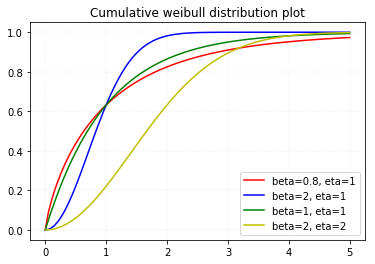

In [372]:
weib0_F_list = [weib_F(t,0.8,1) for t in t_list]
weib1_F_list = [weib_F(t,2,1) for t in t_list]
weib2_F_list = [weib_F(t,1,1) for t in t_list]
weib3_F_list = [weib_F(t,2,2) for t in t_list]


plt.plot(t_list,weib0_F_list,'r',label = 'beta=0.8, eta=1')
plt.plot(t_list,weib1_F_list,'b',label = 'beta=2, eta=1')
plt.plot(t_list,weib2_F_list,'g',label = 'beta=1, eta=1')
plt.plot(t_list,weib3_F_list,'y',label = 'beta=2, eta=2')

plt.title('Cumulative weibull distribution plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend()

##### 2.3 예제
1. 어떤제품의 수명분포는 형상모수가 2, 척도모수가 500시간인 와이블분포를 따른다. 

    이제품의 수명분포를 그리시오(0~1000시간)

2. 이제품의 고장누적확률 분포를 그리시오(0~1000시간)

1

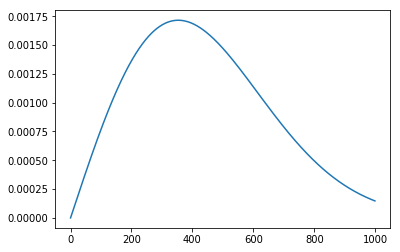

In [384]:
t_list = [t for t in range(1000)]
weib_f_list = [weib_f(t,2,500) for t in t_list]
plt.plot(t_list,weib_f_list)
plt.show()

2

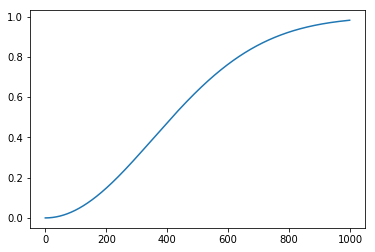

In [385]:
t_list = [t for t in range(1000)]
weib_F_list = [weib_F(t,2,500) for t in t_list]
plt.plot(t_list,weib_F_list)
plt.show()

## Note

In [5]:
# 범위 설정 방법

t_1 = list(np.linspace(0,5,100)) # 특정 범위를 특정 개수로 쪼갤 때
t_2 = [t for t in range(2000)] # 특정 범위를 1단위로 쪼갤 때
t_3 = list(np.arange(2000)) # 특정 범위를 1 단위로 쪼갤 때(My Idea)